In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)

In [89]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [37]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
print(train_data.shape)
print(test_data.shape)

(10683, 11)
(2671, 10)


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [90]:
train_data=train_data.dropna(axis=0, how='any')

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [91]:
# Converting 'Duration' column into a list
duration_train = list(train_data["Duration"])

In [92]:
for i in range(len(duration_train)):
    if(duration_train[i].split()) != 2 :
         if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
         else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour

In [93]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [94]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [95]:
train_data.drop('Duration', axis=1, inplace=True)

In [96]:
# Date_of_Journey conversion
train_data['Journey_day']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
train_data.drop('Date_of_Journey', axis = 1, inplace = True)

In [97]:
# Departure time
train_data['Dep_hr'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time', axis = 1, inplace = True)

C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\2456806840.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_hr'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\2456806840.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


In [98]:
# Arrival time
#Now, we take care of Arrival_Time
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\1786971563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\1786971563.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [99]:
#Airlines
#One hot encoding
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [100]:
Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [101]:
Source=train_data[['Source']]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [102]:
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [103]:
train_data = pd.concat([train_data, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
train_data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)

In [104]:
train_data.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2 stops,7662,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2 stops,13882,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1 stop,6218,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1 stop,13302,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [105]:
train_data.shape

(10682, 30)

In [106]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['Total_Stops'] = encoder.fit_transform(train_data['Total_Stops'])

Test Data 

In [38]:
#Same thing that we did with train data
duration_test = list(test_data['Duration'])

In [39]:
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))

In [40]:
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins

In [41]:
test_data.drop('Duration', axis=1, inplace=True)

In [42]:
test_data['Journey_day']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_month']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data.drop('Date_of_Journey', axis = 1, inplace = True)

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis = 1, inplace = True)

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\3556350470.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\3556350470.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\3556350470.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
C:\Users\S

In [47]:
test_data.head(10)

,Total_Stops,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,4,0,12,5,6,20,10,20,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,23,45,21,5,19,15,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,13,0,21,5,8,0,21,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,2,50,24,6,23,55,2,45,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,1,18,20,12,6,18,15,12,35,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
6,1,15,5,12,3,7,30,22,35,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,1,5,15,1,5,15,15,20,30,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8,0,2,45,15,3,10,10,12,55,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
9,1,6,5,18,5,16,30,22,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [46]:
test_data.shape

(2671, 28)

In [44]:
Airline=test_data[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)

Source=test_data[['Source']]
Source=pd.get_dummies(Source, drop_first= True)

Destination=test_data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
test_data= pd.concat([test_data, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test_data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_data['Total_Stops'] = encoder.fit_transform(test_data['Total_Stops'])

print(test_data.shape)
test_data.head()

KeyError: "None of [Index(['Airline'], dtype='object')] are in the [columns]"

In [107]:
train_data.columns

Index(['Total_Stops', 'Price', 'Duration_hours', 'Duration_mins',
       'Journey_day', 'Journey_month', 'Dep_hr', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [108]:
train_data.rename(columns={"Dep_hr":"Dep_hour"},inplace=True)

In [109]:
train_data.columns

Index(['Total_Stops', 'Price', 'Duration_hours', 'Duration_mins',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [49]:
test_data.columns

Index(['Total_Stops', 'Duration_hours', 'Duration_mins', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [110]:
train_data.head()

,Total_Stops,Price,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [111]:
price=train_data.Price
train_data.drop('Price', axis=1, inplace=True)
train_data=train_data.join(price)
train_data.head()

,Total_Stops,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3897
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7662
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,13882
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6218
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,13302


In [112]:
X = train_data.loc[:, ['Total_Stops',  'Duration_hours', 'Duration_mins',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hours,Duration_mins,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [114]:
y = train_data.iloc[:, -1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

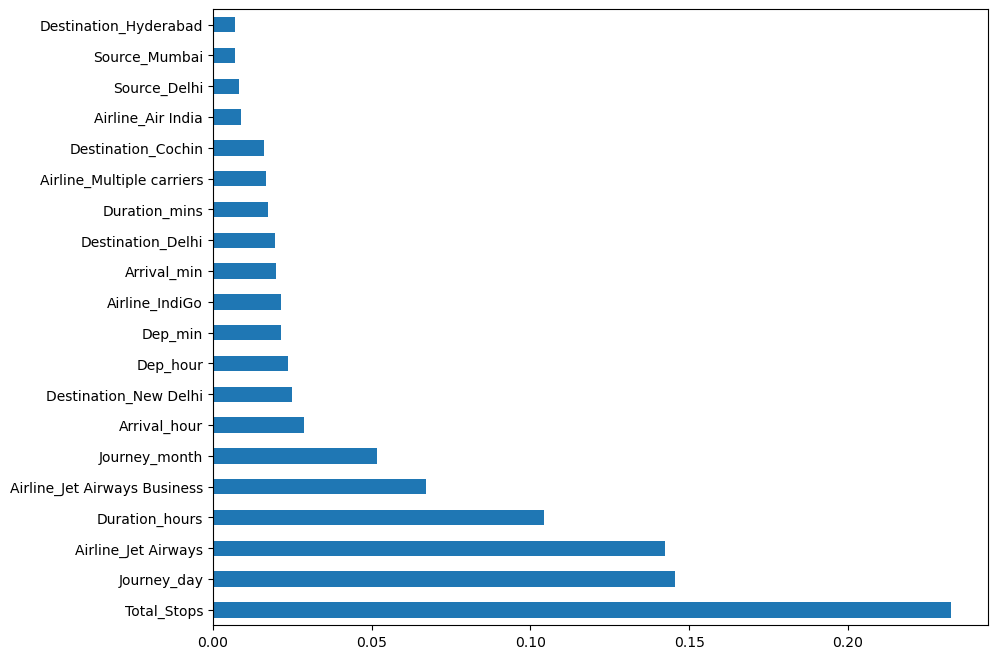

In [115]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [117]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Score on Training set is 0.8902064460250254
Random Forest Score on Test Set is 0.8243727461514716


c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(
c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `m

[0.86344855 0.8497669  0.77028344 0.85604065 0.8358707  0.84901219
 0.77801593 0.84825995 0.83970412 0.70755415 0.83483351 0.83941541
 0.8732313  0.85022793 0.85969625 0.86158349 0.85060281 0.84649645
 0.81946327 0.73985375]
Accuracy: 82.87 %
Standard Deviation: 4.33 %
Mean Absolute Error: 1208.4016958475456
Mean Squared Error: 4120772.986276042
RMSE: 2029.9687155904749
The r2_score is 0.8243727461514716


C:\Users\Sudeeksha\AppData\Local\Temp\ipykernel_19188\3227736557.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
c:\Users\Sudeeksha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


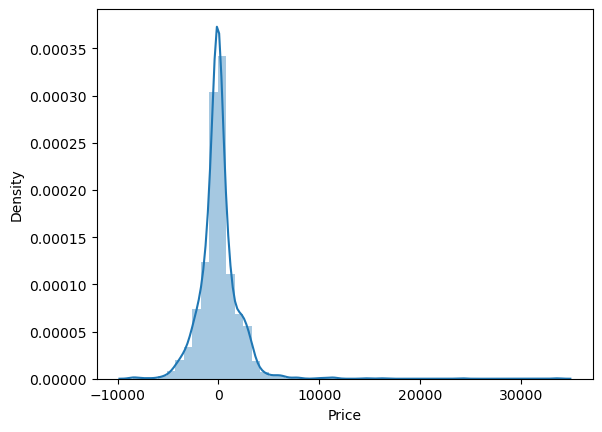

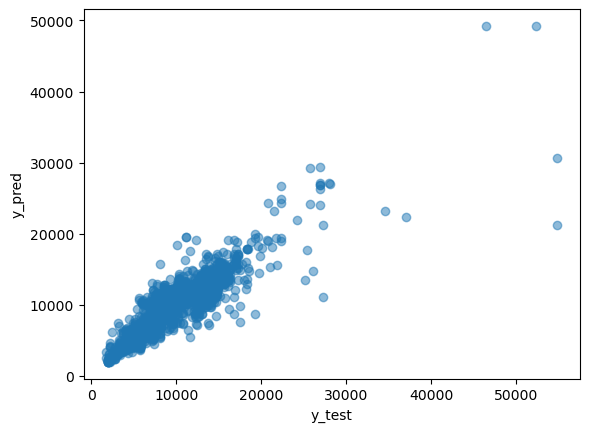

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test.values)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [119]:
import pickle
# dump information to the file
pickle.dump(rf_reg, open('rf_reg.pkl', 'wb'))
model = pickle.load(open('rf_reg.pkl', 'rb'))

In [120]:
model.predict([[0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

c:\Users\Sudeeksha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5291.71344506])